# Importing Libraries

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from wordcloud import WordCloud 
import warnings
import re 
import string 


# Loading  the  dataset  

In [109]:
link=pd.read_csv("linkedin_data 2023-03-31_final.csv")     

# Exploratory Data Analysis(EDA)

##  Basic Data Exploration

In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

– head of the dataset – the shape of the dataset – info of the dataset

In [110]:
link

,Date,Job_Name,Company,Loaction,Job_type,Employees,Followers,Applicant,Industry,Invovlement
0,3/31/2023,"Client Technology: Platform Engineering, Senio...",EY,"Trivandrum, Kerala, India",On-site,"10,001+ employees","7,366,377 followers",9 applicants,Information Technology & Services,Full-time · Mid-Senior level
1,3/31/2023,Associate - Global Intelligence (Open Source C...,JPMorgan Chase & Co.,"Mumbai, Maharashtra, India",On-site,"10,001+ employees","3,791,093 followers",10 applicants,Financial Services,Full-time
2,3/31/2023,MTS Software Development Eng.,AMD,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","1,068,681 followers",41 applicants,Semiconductors,Full-time · Mid-Senior level
3,3/31/2023,Tech Lead - Wifi Development,VVDN Technologies,"Chennai, Tamil Nadu, India",On-site,"10,001+ employees","62,010 followers",13 applicants,Information Technology & Services,Full-time · Mid-Senior level
4,3/31/2023,Senior Application Specialist,Leica Biosystems,"Mumbai, Maharashtra, India",On-site,"1,001-5,000 employees","86,924 followers",78 applicants,Medical Device,Full-time
...,...,...,...,...,...,...,...,...,...,...
1122,3/31/2023,AM- Analytics-ANA007048,Genpact,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","2,639,117 followers",58 applicants,Information Technology & Services,Full-time · Associate
1123,3/31/2023,Senior Data & API Consultant,Pluralsight,"Bengaluru, Karnataka, India",Hybrid,"1,001-5,000 employees","175,876 followers",3 applicants,Computer Software,Full-time · Mid-Senior level
1124,3/31/2023,Staff,Bunge,"Andhra Pradesh, India",On-site,"10,001+ employees","1,213,984 followers",66 applicants,Food Production,Full-time · Associate
1125,3/31/2023,Software Performance Analyst (Cyber Security),BlackBerry,"Uttar Pradesh, India",On-site,"5,001-10,000 employees","306,410 followers",65 applicants,Computer Software,Full-time


In [111]:
link.shape

(1127, 10)

In [112]:
link.drop(columns=['Date'],axis=1,inplace=True)

# Text cleaning

In [113]:
link[['City', 'state']] = link['Loaction'].str.split(', ',n=1, expand=True)
link.drop(columns=['Loaction'],axis=1,inplace=True)

In [114]:
# define a function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [115]:
#remove all the punctuations
link1 = link.copy()
link1.loc[:, 'Job_Name']  =link1.loc[:, 'Job_Name'] .str.replace('[{}]'.format(string.punctuation), '', regex=True)
link1.loc[:, 'Followers']  =link1.loc[:, 'Followers'] .str.replace('[{}]'.format(string.punctuation), '', regex=True)
link1.loc[:, 'state']  =link1.loc[:, 'state'] .str.replace('[{}]'.format(string.punctuation), '', regex=True)


In [116]:
# Remove the word "followers" from the "Followers" column
link1['Followers'] = link1['Followers'].str.replace('followers', '')

In [117]:
# Remove the word "Applicant" from the "Applicant" column
link1['Applicant'] = link['Applicant'].str.replace('applicants', '')

In [118]:
# Remove the word "India" from the "state" column
link1['state'] = link1['state'].str.replace('india', '') 

In [119]:
link1

,Job_Name,Company,Job_type,Employees,Followers,Applicant,Industry,Invovlement,City,state
0,Client Technology Platform Engineering Senior ...,EY,On-site,"10,001+ employees",7366377,9,Information Technology & Services,Full-time · Mid-Senior level,Trivandrum,Kerala India
1,Associate Global Intelligence Open Source Col...,JPMorgan Chase & Co.,On-site,"10,001+ employees",3791093,10,Financial Services,Full-time,Mumbai,Maharashtra India
2,MTS Software Development Eng,AMD,On-site,"10,001+ employees",1068681,41,Semiconductors,Full-time · Mid-Senior level,Bengaluru,Karnataka India
3,Tech Lead Wifi Development,VVDN Technologies,On-site,"10,001+ employees",62010,13,Information Technology & Services,Full-time · Mid-Senior level,Chennai,Tamil Nadu India
4,Senior Application Specialist,Leica Biosystems,On-site,"1,001-5,000 employees",86924,78,Medical Device,Full-time,Mumbai,Maharashtra India
...,...,...,...,...,...,...,...,...,...,...
1122,AM AnalyticsANA007048,Genpact,On-site,"10,001+ employees",2639117,58,Information Technology & Services,Full-time · Associate,Bengaluru,Karnataka India
1123,Senior Data API Consultant,Pluralsight,Hybrid,"1,001-5,000 employees",175876,3,Computer Software,Full-time · Mid-Senior level,Bengaluru,Karnataka India
1124,Staff,Bunge,On-site,"10,001+ employees",1213984,66,Food Production,Full-time · Associate,Andhra Pradesh,India
1125,Software Performance Analyst Cyber Security,BlackBerry,On-site,"5,001-10,000 employees",306410,65,Computer Software,Full-time,Uttar Pradesh,India


In [120]:
link1.tail()

,Job_Name,Company,Job_type,Employees,Followers,Applicant,Industry,Invovlement,City,state
1122,AM AnalyticsANA007048,Genpact,On-site,"10,001+ employees",2639117,58,Information Technology & Services,Full-time · Associate,Bengaluru,Karnataka India
1123,Senior Data API Consultant,Pluralsight,Hybrid,"1,001-5,000 employees",175876,3,Computer Software,Full-time · Mid-Senior level,Bengaluru,Karnataka India
1124,Staff,Bunge,On-site,"10,001+ employees",1213984,66,Food Production,Full-time · Associate,Andhra Pradesh,India
1125,Software Performance Analyst Cyber Security,BlackBerry,On-site,"5,001-10,000 employees",306410,65,Computer Software,Full-time,Uttar Pradesh,India
1126,Team LeadBig Data,Infogain,On-site,"5,001-10,000 employees",209419,40,Information Technology & Services,Full-time,Gurugram,Haryana India


In [121]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
link1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Job_Name     1127 non-null   object
 1   Company      1127 non-null   object
 2   Job_type     1127 non-null   object
 3   Employees    1127 non-null   object
 4   Followers    1127 non-null   object
 5   Applicant    1126 non-null   object
 6   Industry     1126 non-null   object
 7   Invovlement  1127 non-null   object
 8   City         1127 non-null   object
 9   state        1058 non-null   object
dtypes: object(10)
memory usage: 88.2+ KB


In [122]:
list(link1.columns)

['Job_Name',
 'Company',
 'Job_type',
 'Employees',
 'Followers',
 'Applicant',
 'Industry',
 'Invovlement',
 'City',
 'state']

# Handling missing value

In [123]:
#checking for missing value in any column
link1.isnull().sum()

Job_Name        0
Company         0
Job_type        0
Employees       0
Followers       0
Applicant       1
Industry        1
Invovlement     0
City            0
state          69
dtype: int64

In [124]:
#Replacing NULL values in catogrical Columns using Mode
mode1=link1['Applicant'].mode().values[0]
mode2=link1['Industry'].mode().values[0]
mode3=link1['state'].mode().values[0]
link1['Applicant']=link1['Applicant'].replace(np.nan,mode1)
link1['Industry']=link1['Industry'].replace(np.nan,mode2)
link1['state']=link1['state'].replace(np.nan,mode3)


In [125]:
link1.isnull().sum()

Job_Name       0
Company        0
Job_type       0
Employees      0
Followers      0
Applicant      0
Industry       0
Invovlement    0
City           0
state          0
dtype: int64

# Handling Duplicate records 

In [126]:
link1.duplicated().sum()  

79

In [127]:
link1 = link1.drop_duplicates()

In [128]:
link1

,Job_Name,Company,Job_type,Employees,Followers,Applicant,Industry,Invovlement,City,state
0,Client Technology Platform Engineering Senior ...,EY,On-site,"10,001+ employees",7366377,9,Information Technology & Services,Full-time · Mid-Senior level,Trivandrum,Kerala India
1,Associate Global Intelligence Open Source Col...,JPMorgan Chase & Co.,On-site,"10,001+ employees",3791093,10,Financial Services,Full-time,Mumbai,Maharashtra India
2,MTS Software Development Eng,AMD,On-site,"10,001+ employees",1068681,41,Semiconductors,Full-time · Mid-Senior level,Bengaluru,Karnataka India
3,Tech Lead Wifi Development,VVDN Technologies,On-site,"10,001+ employees",62010,13,Information Technology & Services,Full-time · Mid-Senior level,Chennai,Tamil Nadu India
4,Senior Application Specialist,Leica Biosystems,On-site,"1,001-5,000 employees",86924,78,Medical Device,Full-time,Mumbai,Maharashtra India
...,...,...,...,...,...,...,...,...,...,...
1121,Senior Tableau Developer,Valiantys - Atlassian Platinum Solution Partner,Remote,"501-1,000 employees",8449,72,Information Technology & Services,Full-time,Delhi,Delhi India
1122,AM AnalyticsANA007048,Genpact,On-site,"10,001+ employees",2639117,58,Information Technology & Services,Full-time · Associate,Bengaluru,Karnataka India
1123,Senior Data API Consultant,Pluralsight,Hybrid,"1,001-5,000 employees",175876,3,Computer Software,Full-time · Mid-Senior level,Bengaluru,Karnataka India
1124,Staff,Bunge,On-site,"10,001+ employees",1213984,66,Food Production,Full-time · Associate,Andhra Pradesh,India


# check duplicate data again 

In [129]:
link1.duplicated().sum() 
  

0

In [130]:
link1.describe().T     

,count,unique,top,freq
Job_Name,1048,693,Data Analyst,62
Company,1048,520,Accenture in India,50
Job_type,1048,3,On-site,676
Employees,1048,9,"10,001+ employees",539
Followers,1048,932,8734,9
Applicant,1048,206,1 month ago O...,31
Industry,1048,66,Information Technology & Services,396
Invovlement,1048,20,Full-time · Mid-Senior level,488
City,1048,93,Bengaluru,271
state,1048,26,Karnataka India,386


In [131]:
link1['City'].value_counts().head(10).to_frame().style.set_caption('Most Demand Company').background_gradient(cmap='Blues')

,City
Bengaluru,271
Mumbai,116
Hyderabad,93
Pune,78
Chennai,62
Gurgaon,39
India,33
Bengaluru East,27
Noida,26
Gurugram,19


In [132]:
link1['Company'].value_counts().head(10).to_frame().style.set_caption('Most Demand Company').background_gradient(cmap='Blues')

,Company
Accenture in India,50
Wells Fargo,31
EY,22
BNY Mellon,20
Citi,20
Tata Consultancy Services,19
Infosys,19
UST,18
S&P Global,14
HCLTech,14


In [133]:
link1['Job_Name'].value_counts().head(10).to_frame().style.set_caption('Most Demand Company').background_gradient(cmap='Blues')

,Job_Name
Data Analyst,62
Senior Data Analyst,12
Senior Analytics Consultant,11
Senior Software Engineer,7
EAPUData Analyst PU OTStaff,7
Customer Service New AssociateQuery Management,7
Lead II Data Analysis,7
Lead Data Analyst,7
InBusiness Credit Risk Quality Assurance Data Analyst for Wealth Management,6
Senior Data AnalystData Modellers,6


####  BAR plot visualization

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

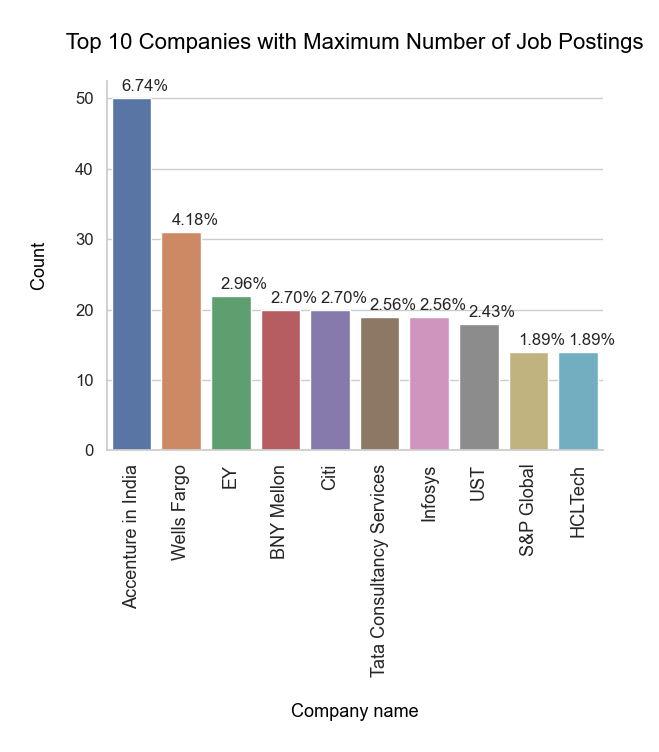

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st 

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x=link1["Company"].value_counts().sort_values(ascending=False).head(10).index, y=link1["Company"].value_counts().sort_values(ascending=False).head(10), ax=ax)

sns.despine(bottom=False, left=False)

spots = link1["Company"].value_counts().sort_values(ascending=False).index[0:10]
for p in a.patches:
    a.annotate('{:.2f}%'.format((p.get_height() / 742) * 100), (p.get_x() + 0.2, p.get_height() + 1), fontsize=12)

plt.title('\n Top 10 Companies with Maximum Number of Job Postings \n', size=16, color='black')
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')

st.pyplot(fig)


#### PIE CHART VISUALIZATION

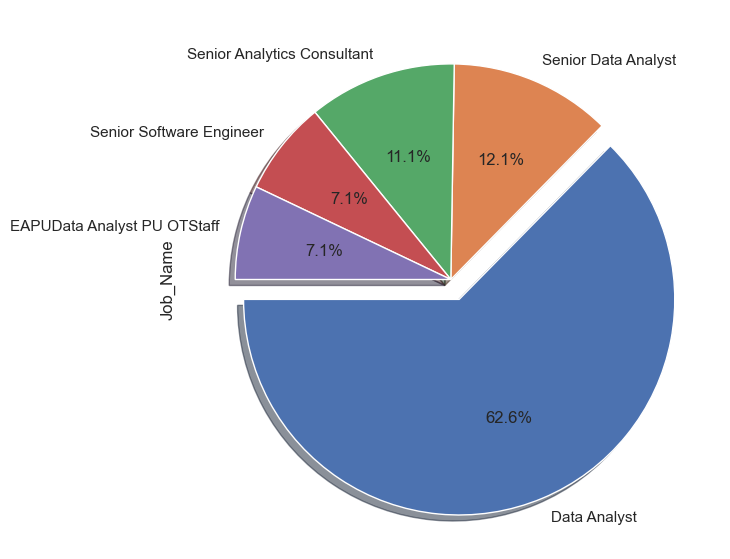

In [135]:
link1['Job_Name'].value_counts()[:5].plot(kind = 'pie',autopct='%1.1f%%',startangle=180,shadow=True ,explode = [0.1,0,0,0,0])
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

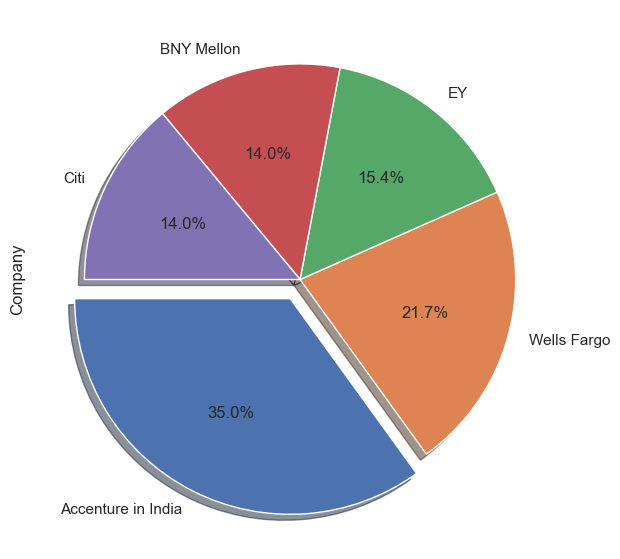

In [136]:
link1['Company'].value_counts()[:5].plot(kind = 'pie',autopct='%1.1f%%',startangle=180,shadow=True ,explode = [0.1,0,0,0,0])
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

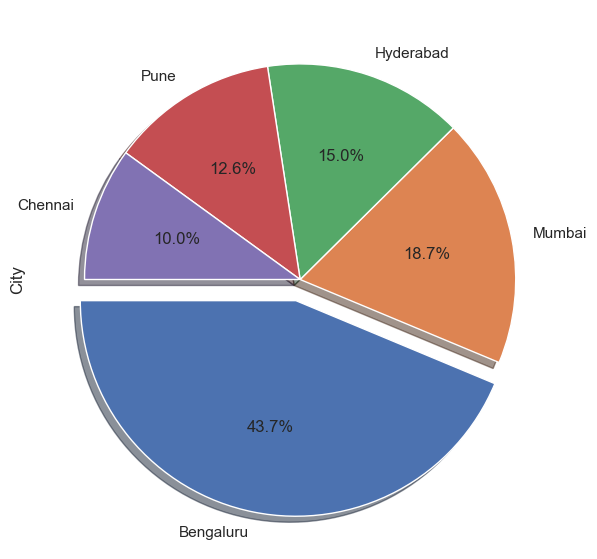

In [137]:
link1['City'].value_counts()[:5].plot(kind = 'pie',autopct='%1.1f%%',startangle=180,shadow=True ,explode = [0.1,0,0,0,0])
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

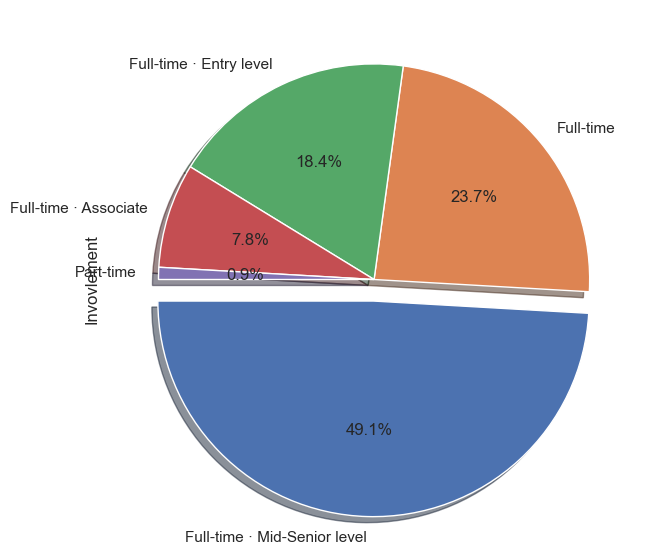

In [138]:
link1['Invovlement'].value_counts()[:5].plot(kind = 'pie',autopct='%1.1f%%',startangle=180,shadow=True ,explode = [0.1,0,0,0,0])
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

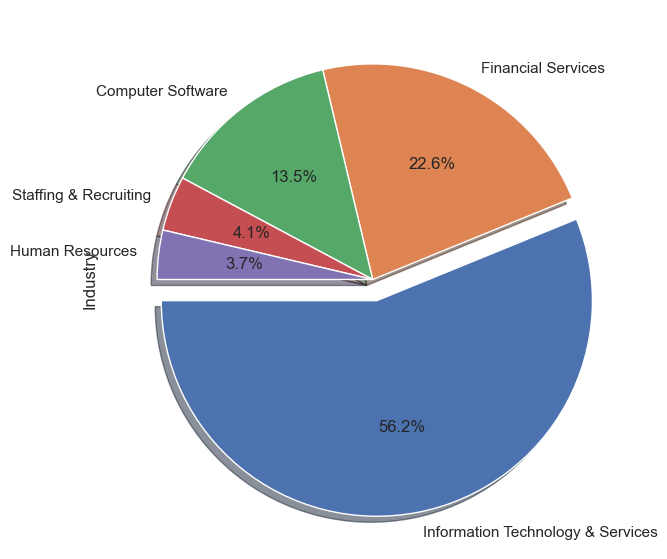

In [139]:
link1['Industry'].value_counts()[:5].plot(kind = 'pie',autopct='%1.1f%%',startangle=180,shadow=True ,explode = [0.1,0,0,0,0])
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

# Model building 

In [140]:
#importing libraries for content-based recommendation.
import ast 
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import warnings

In [141]:
link1.head()

,Job_Name,Company,Job_type,Employees,Followers,Applicant,Industry,Invovlement,City,state
0,Client Technology Platform Engineering Senior ...,EY,On-site,"10,001+ employees",7366377,9,Information Technology & Services,Full-time · Mid-Senior level,Trivandrum,Kerala India
1,Associate Global Intelligence Open Source Col...,JPMorgan Chase & Co.,On-site,"10,001+ employees",3791093,10,Financial Services,Full-time,Mumbai,Maharashtra India
2,MTS Software Development Eng,AMD,On-site,"10,001+ employees",1068681,41,Semiconductors,Full-time · Mid-Senior level,Bengaluru,Karnataka India
3,Tech Lead Wifi Development,VVDN Technologies,On-site,"10,001+ employees",62010,13,Information Technology & Services,Full-time · Mid-Senior level,Chennai,Tamil Nadu India
4,Senior Application Specialist,Leica Biosystems,On-site,"1,001-5,000 employees",86924,78,Medical Device,Full-time,Mumbai,Maharashtra India


In [142]:
link1_copy=link1

In [143]:
link1_copy = link1.reset_index(drop=True).copy()

In [144]:
link1_copy.loc[:, 'Job_Name'] = link1_copy['Job_Name'].fillna('')
link1_copy.loc[:, 'City'] = link1_copy['City'].fillna('')
link1_copy.loc[:, 'Description'] = link1_copy['Job_Name'] + link1_copy['City']  

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=0,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            stop_words = 'english')

 

In [146]:
# Fitting the TF-IDF on the 'Job_name' text
tfv_matrix = tfv.fit_transform(link1_copy['Description'])

In [147]:
tfv_matrix

<1048x2852 sparse matrix of type '<class 'numpy.float64'>'
	with 6869 stored elements in Compressed Sparse Row format>

In [148]:
tfv_matrix.shape  

(1048, 2852)

In [149]:
#find the most similar words 
cosine_sim = linear_kernel(tfv_matrix, tfv_matrix)

In [150]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [151]:
sig[0]

array([0.76174137, 0.76159416, 0.76159416, ..., 0.76159786, 0.76159416,
       0.76159416])

In [152]:
#  mapping of indices and job_name
indices = pd.Series(link1_copy.index, index=link1_copy['Job_Name']).drop_duplicates()


In [153]:
indices

Job_Name
Client Technology Platform Engineering Senior DevOps engineer       0
Associate  Global Intelligence Open Source Collection Cell          1
MTS Software Development Eng                                        2
Tech Lead  Wifi Development                                         3
Senior Application Specialist                                       4
                                                                 ... 
Senior Tableau Developer                                         1043
AM AnalyticsANA007048                                            1044
Senior Data  API Consultant                                      1045
Staff                                                            1046
Team LeadBig Data                                                1047
Length: 1048, dtype: int64

In [154]:
def get_top_similar_jobs(Job_Name):
    # Get the indices of jobs matching the given Job_Name
    Job_indices = job_data.index[job_data['Job_Name'] == Job_Name].tolist()
    
    # Get the cosine similarity scores between the given Job_Name and all other Job_Names
    Job_sim_scores = cosine_sim[Job_indices].mean(axis=0)
    
    # Get the indices of the top 5 jobs with the highest similarity scores
    top_job_indices = Job_sim_scores.argsort()[::-1][:5]
    
    # Get the job names and corresponding similarity scores
    top_jobs = [(idx, Job_sim_scores[idx]) for idx in top_job_indices]
    
    # Create a list of top similar jobs
    top_jobs = [(job_data.loc[idx, 'Job_Name'], job_data.loc[idx, 'Company'], job_data.loc[idx, 'Followers'], score) for idx, score in top_jobs]
    
    # Create a pandas dataframe from the list of top similar jobs
    df = pd.DataFrame(top_jobs, columns=['Job_Name', 'Company', 'Followers', 'Similarity_Score'])
    
    # Return the top 5 similar jobs for the given Job_Name
    return df.head(5)


In [155]:
job_data =link1_copy

In [156]:
job_data

,Job_Name,Company,Job_type,Employees,Followers,Applicant,Industry,Invovlement,City,state,Description
0,Client Technology Platform Engineering Senior ...,EY,On-site,"10,001+ employees",7366377,9,Information Technology & Services,Full-time · Mid-Senior level,Trivandrum,Kerala India,Client Technology Platform Engineering Senior ...
1,Associate Global Intelligence Open Source Col...,JPMorgan Chase & Co.,On-site,"10,001+ employees",3791093,10,Financial Services,Full-time,Mumbai,Maharashtra India,Associate Global Intelligence Open Source Col...
2,MTS Software Development Eng,AMD,On-site,"10,001+ employees",1068681,41,Semiconductors,Full-time · Mid-Senior level,Bengaluru,Karnataka India,MTS Software Development EngBengaluru
3,Tech Lead Wifi Development,VVDN Technologies,On-site,"10,001+ employees",62010,13,Information Technology & Services,Full-time · Mid-Senior level,Chennai,Tamil Nadu India,Tech Lead Wifi DevelopmentChennai
4,Senior Application Specialist,Leica Biosystems,On-site,"1,001-5,000 employees",86924,78,Medical Device,Full-time,Mumbai,Maharashtra India,Senior Application SpecialistMumbai
...,...,...,...,...,...,...,...,...,...,...,...
1043,Senior Tableau Developer,Valiantys - Atlassian Platinum Solution Partner,Remote,"501-1,000 employees",8449,72,Information Technology & Services,Full-time,Delhi,Delhi India,Senior Tableau DeveloperDelhi
1044,AM AnalyticsANA007048,Genpact,On-site,"10,001+ employees",2639117,58,Information Technology & Services,Full-time · Associate,Bengaluru,Karnataka India,AM AnalyticsANA007048Bengaluru
1045,Senior Data API Consultant,Pluralsight,Hybrid,"1,001-5,000 employees",175876,3,Computer Software,Full-time · Mid-Senior level,Bengaluru,Karnataka India,Senior Data API ConsultantBengaluru
1046,Staff,Bunge,On-site,"10,001+ employees",1213984,66,Food Production,Full-time · Associate,Andhra Pradesh,India,StaffAndhra Pradesh


In [157]:
job_data.drop(columns=['Description'],axis=1,inplace=True)

In [158]:
job_data.head(20)  

,Job_Name,Company,Job_type,Employees,Followers,Applicant,Industry,Invovlement,City,state
0,Client Technology Platform Engineering Senior ...,EY,On-site,"10,001+ employees",7366377,9,Information Technology & Services,Full-time · Mid-Senior level,Trivandrum,Kerala India
1,Associate Global Intelligence Open Source Col...,JPMorgan Chase & Co.,On-site,"10,001+ employees",3791093,10,Financial Services,Full-time,Mumbai,Maharashtra India
2,MTS Software Development Eng,AMD,On-site,"10,001+ employees",1068681,41,Semiconductors,Full-time · Mid-Senior level,Bengaluru,Karnataka India
3,Tech Lead Wifi Development,VVDN Technologies,On-site,"10,001+ employees",62010,13,Information Technology & Services,Full-time · Mid-Senior level,Chennai,Tamil Nadu India
4,Senior Application Specialist,Leica Biosystems,On-site,"1,001-5,000 employees",86924,78,Medical Device,Full-time,Mumbai,Maharashtra India
5,Sales Engineer,Thought Machine,On-site,"501-1,000 employees",58555,18,Computer Software,Full-time,Mumbai Metropolitan Region,Karnataka India
6,Openstack Administrator,TIS Labs Pvt Ltd,On-site,51-200 employees,8801,66,Information Technology & Services,Full-time · Mid-Senior level,Andhra Pradesh,India
7,TCS Hiring for Network Data RS Aruba Wireless,Tata Consultancy Services,Hybrid,"10,001+ employees",12345310,1 week ago Ov...,Information Technology & Services,Full-time · Associate,New Delhi,Delhi India
8,Value Stream Leader,GKN Automotive,On-site,"10,001+ employees",107995,154,Automotive,Full-time · Mid-Senior level,Sriperumbudur,Tamil Nadu India
9,DevSecops EngineerApplication Security Engineer,Ingram Micro,Hybrid,"10,001+ employees",411809,75,Information Technology & Services,Full-time · Mid-Senior level,Chennai,Tamil Nadu India


In [159]:
# Create a TfidfVectorizer object to convert the job name and city into vectors
tfidf = TfidfVectorizer(stop_words='english')

# Create a matrix of job name and city vectors
job_city_matrix = tfidf.fit_transform(job_data['Job_Name'] + ' ' +job_data['City'])

# Compute the cosine similarity of job name and city vectors
cosine_sim = cosine_similarity(job_city_matrix, job_city_matrix)

# Define a function to get the top 5 similar job names based on the given city
def get_top_similar_jobs(city_name):
    # Get the indices of jobs matching the given city
    city_indices = job_data.index[job_data['City'] == city_name].tolist()
    
    # Get the cosine similarity scores between the given city and all other cities
    city_sim_scores = cosine_sim[city_indices].mean(axis=0)
    
    # Get the indices of the top 5 jobs with the highest similarity scores
    top_job_indices = city_sim_scores.argsort()[::-1][:5]
    
    # Get the job names and corresponding similarity scores
    top_jobs = [(idx, city_sim_scores[idx]) for idx in top_job_indices]
    
    # Create a list of top similar jobs
    top_jobs = [(job_data.loc[idx, 'Job_Name'], job_data.loc[idx, 'Company'], job_data.loc[idx, 'Followers'], score) for idx, score in top_jobs]
    
    # Create a pandas dataframe from the list of top similar jobs
    df = pd.DataFrame(top_jobs, columns=['Job_Name', 'Company', 'Followers', 'Similarity_Score'])
    
    # Return the top 5 similar jobs for the given city
    return df.head(5)

In [160]:
city_name = 'Delhi'
top_jobs = get_top_similar_jobs(city_name)
display(top_jobs)

,Job_Name,Company,Followers,Similarity_Score
0,Power BI,Diverse Lynx,73255,0.357628
1,Power BI Consultant 1 1,Worldline,191666,0.343013
2,Lead Software Engineer,Biz2Credit,35952,0.331429
3,Dotnet Developer,Tata Consultancy Services,12345472,0.307993
4,Senior Tableau Developer,Valiantys - Atlassian Platinum Solution Partner,8449,0.304485


In [161]:
city_name = 'Bengaluru'
top_jobs = get_top_similar_jobs(city_name)
display(top_jobs)

,Job_Name,Company,Followers,Similarity_Score
0,Data Analyst 3,Zynga,212344,0.272426
1,Data Analyst,Mantys (YC W23),1215,0.272426
2,Data Analyst,Acme Services,162620,0.272426
3,Data Analyst,IKEA,2652482,0.272426
4,Data Analyst,Falcon Smart IT (FalconSmartIT),55048,0.272426


In [162]:
city_name = 'Hyderabad'
top_jobs = get_top_similar_jobs(city_name)
display(top_jobs)

,Job_Name,Company,Followers,Similarity_Score
0,Data Analyst,Right Advisors Private Limited,21081,0.378797
1,Data Analyst,Ampstek,203075,0.378797
2,Data Analyst,NxtWave,114267,0.378797
3,Data Analyst,Keyloop,58990,0.378797
4,Data Analyst,Dun & Bradstreet Technology and Corporate Serv...,9044,0.378797


In [163]:
city_name = 'Mumbai'
top_jobs = get_top_similar_jobs(city_name)
display(top_jobs)

,Job_Name,Company,Followers,Similarity_Score
0,Data Analyst,Acme Services,162594,0.331373
1,Data Analyst,Acme Services,162618,0.331373
2,Data Analyst,Acme Services,162453,0.331373
3,Data Analyst,Acme Services,162469,0.331373
4,Data Analyst,Etraveli Group,57196,0.331373


In [164]:
city_name = 'Chennai'
top_jobs = get_top_similar_jobs(city_name)
display(top_jobs)

,Job_Name,Company,Followers,Similarity_Score
0,Data Analyst,Spendflo,7423,0.452379
1,Data Analyst,Yo Hr Consultancy,3867,0.452379
2,Data Analyst,Right Advisors Private Limited,21074,0.452379
3,Data Analyst,"Saaki, Argus and Averil Consulting",3911,0.452379
4,Senior Data Analyst,Mobile Programming LLC,296987,0.429595


In [165]:
city_name = 'Gurugram'
top_jobs = get_top_similar_jobs(city_name)
display(top_jobs)

,Job_Name,Company,Followers,Similarity_Score
0,Data Analyst,Kia India,326231,0.494130
1,Lead Data Analyst,The Economist,13163852,0.443492
2,Senior Technical Architect,Yabx,10563,0.387856
3,Senior Technical Architect,Builder.ai,152281,0.387856
4,Senior Consultant Data AnalyticsCPG038927,Genpact,2639232,0.375857
